In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import benji_utils as utils
import bbbfs_algorithms as bbbfa

import networkit as nk

In [6]:
import importlib
importlib.reload(bbbfa)

<module 'bbbfs_algorithms' from '/Users/benjidayan/coding/external-validity/benji/bbbfs_algorithms.py'>

In [7]:
df = utils.df
# iloc 500 sized chunks of the dataframe
df_graphs = []
for i in range(0, len(df), 500):
    df_graphs.append(df.iloc[i:i+500])

# make sure each graph is in its own dataframe
seen = set()
for df_graph in df_graphs:
    assert len(df_graph.graph.unique()) == 1
    assert df_graph.graph.unique()[0] not in seen
    seen.add(df_graph.graph.unique()[0])

import concurrent.futures
from tqdm import tqdm

from bbbfs_algorithms import BiBFS_VertexBalancedApproximate, BiBFS_ExactExpandSmallerQueue, BiBFS_ExactCheckDirectEdges, BiBFS_EdgeBalancedApproximate, run_for_rows


In [8]:
df.graph.unique()[:5]

array(['08blocks', '1138_bus', '130bit', '145bit', '162bit'], dtype=object)

In [9]:
g = utils.graph_name_to_nk('1138_bus')
g.numberOfNodes()
g.numberOfEdges()

AttributeError: module 'benji_utils' has no attribute 'graph_name_to_nk_graph'

In [7]:
run_for_rows([x for _, x in df_graphs[0].iterrows()], [BiBFS_VertexBalancedApproximate, BiBFS_ExactExpandSmallerQueue, BiBFS_ExactCheckDirectEdges, BiBFS_EdgeBalancedApproximate])

[graph                                         08blocks
 algo            python-BiBFS_VertexBalancedApproximate
 seed                                        3404785993
 s                                                    4
 t                                                   23
 dist                                                 2
 time_dist                                     0.000036
 search_space                                         4
 Name: 0, dtype: object,
 graph                                       08blocks
 algo            python-BiBFS_ExactExpandSmallerQueue
 seed                                      3404785993
 s                                                  4
 t                                                 23
 dist                                               2
 time_dist                                   0.000025
 search_space                                      47
 Name: 0, dtype: object,
 graph                                     08blocks
 algo            p

In [10]:
# Assuming run_for_rows and df_graphs are defined
with concurrent.futures.ProcessPoolExecutor(max_workers=4) as executor:
    # Wrap the executor.map call with tqdm
    results = list(tqdm(executor.map(run_for_rows, [[x for _, x in df_graph.iterrows()] for df_graph in df_graphs[:20]], 
                                    [[BiBFS_VertexBalancedApproximate, 
                                    BiBFS_ExactExpandSmallerQueue, 
                                    BiBFS_ExactCheckDirectEdges, 
                                    BiBFS_EdgeBalancedApproximate]]*20), total=len(df_graphs[:20])))

 40%|████      | 8/20 [02:28<03:42, 18.53s/it]


In [4]:
# Function to submit tasks
def submit_tasks(executor, function, iterable1, iterable2):
    futures = []
    for item1, item2 in zip(iterable1, iterable2):
        futures.append(executor.submit(function, item1, item2))
    return futures

num_graphs = 20
iterable1 = [[x for _, x in df_graph.iterrows()] for df_graph in df_graphs[:num_graphs]]
iterable2 = [[BiBFS_VertexBalancedApproximate, BiBFS_ExactExpandSmallerQueue, BiBFS_ExactCheckDirectEdges, BiBFS_EdgeBalancedApproximate]]*num_graphs
with concurrent.futures.ProcessPoolExecutor(max_workers=5) as executor:
    futures = submit_tasks(executor, run_for_rows, iterable1, iterable2)
    
    results = []
    for future in tqdm(concurrent.futures.as_completed(futures), total=len(futures)):
        results.append(future.result())

100%|██████████| 20/20 [08:55<00:00, 26.79s/it]


In [3]:
import concurrent.futures
from tqdm import tqdm

from bbbfs_algorithms import BiBFS_VertexBalancedApproximate, BiBFS_ExactExpandSmallerQueue, BiBFS_ExactCheckDirectEdges, BiBFS_EdgeBalancedApproximate, run_for_rows


# # Assuming run_for_rows and df_graphs are defined
# with concurrent.futures.ProcessPoolExecutor(max_workers=4) as executor:
#     # Wrap the executor.map call with tqdm
#     results = list(tqdm(executor.map(run_for_rows, df_graphs[:20], 
#                                      [BiBFS_VertexBalancedApproximate, 
#                                       BiBFS_ExactExpandSmallerQueue, 
#                                       BiBFS_ExactCheckDirectEdges, 
#                                       BiBFS_EdgeBalancedApproximate]), total=len(df_graphs[:20])))

In [4]:
run_for_rows([x for _, x in df_graphs[0].iterrows()], [BiBFS_VertexBalancedApproximate, BiBFS_ExactExpandSmallerQueue, BiBFS_ExactCheckDirectEdges, BiBFS_EdgeBalancedApproximate])

NameError: name 'df_graphs' is not defined

In [5]:
g = utils.graph_name_to_nk(row.graph)
foo = bbbfa.BiBFS_VertexBalancedApproximate(g, 0, 1)
foo.run()

True

In [7]:
foo.__class__.__name__

'BiBFS_VertexBalancedApproximate'

In [22]:
row = utils.df.iloc[2600]
row
bbbfa.run_for_row(row, algo=bbbfa.BiBFS_VertexBalancedApproximate)
bbbfa.run_for_row(row, algo=bbbfa.BiBFS_ExactExpandSmallerQueue)
bbbfa.run_for_row(row, algo=bbbfa.BiBFS_ExactCheckDirectEdges)
bbbfa.run_for_row(row, algo=bbbfa.BiBFS_EdgeBalancedApproximate)

graph                    176bit
algo            bfs_bi_balanced
seed                 3404785993
s                           836
t                          4613
dist                          3
time_dist              0.006084
search_space                 47
Name: 2600, dtype: object

176bit 836-4613; dist: 3 search_space: 48


graph                                           176bit
algo            python-BiBFS_VertexBalancedApproximate
seed                                        3404785993
s                                                  836
t                                                 4613
dist                                                 3
time_dist                                     0.000202
search_space                                        48
Name: 2600, dtype: object

176bit 836-4613; dist: 3 search_space: 321


graph                                         176bit
algo            python-BiBFS_ExactExpandSmallerQueue
seed                                      3404785993
s                                                836
t                                               4613
dist                                               3
time_dist                                    0.00015
search_space                                     321
Name: 2600, dtype: object

176bit 836-4613; dist: 3 search_space: 49


graph                                       176bit
algo            python-BiBFS_ExactCheckDirectEdges
seed                                    3404785993
s                                              836
t                                             4613
dist                                             3
time_dist                                 0.000104
search_space                                    49
Name: 2600, dtype: object

176bit 836-4613; dist: 4 search_space: 171


graph                                         176bit
algo            python-BiBFS_EdgeBalancedApproximate
seed                                      3404785993
s                                                836
t                                               4613
dist                                               4
time_dist                                   0.001181
search_space                                     171
Name: 2600, dtype: object

In [53]:
new_rows = bbbfa.replicate_experiment(num_graphs=20)

08blocks 4-23; dist: 2 search_space: 4
08blocks 4-23; dist: 2 search_space: 47
08blocks 4-23; dist: 2 search_space: 4
08blocks 4-23; dist: 2 search_space: 4
08blocks 9-32; dist: 2 search_space: 4
08blocks 9-32; dist: 2 search_space: 47
08blocks 9-32; dist: 2 search_space: 4
08blocks 9-32; dist: 2 search_space: 4
08blocks 17-24; dist: 2 search_space: 4
08blocks 17-24; dist: 2 search_space: 47
08blocks 17-24; dist: 2 search_space: 4
08blocks 17-24; dist: 2 search_space: 4
08blocks 12-5; dist: 2 search_space: 4
08blocks 12-5; dist: 2 search_space: 47
08blocks 12-5; dist: 2 search_space: 4
08blocks 12-5; dist: 2 search_space: 4
08blocks 26-32; dist: 2 search_space: 4
08blocks 26-32; dist: 2 search_space: 47
08blocks 26-32; dist: 2 search_space: 4
08blocks 26-32; dist: 2 search_space: 4
08blocks 27-5; dist: 2 search_space: 4
08blocks 27-5; dist: 2 search_space: 47
08blocks 27-5; dist: 2 search_space: 4
08blocks 27-5; dist: 2 search_space: 4
08blocks 4-25; dist: 2 search_space: 4
08blocks 4-

In [55]:
len(new_rows)

8000

In [56]:
new_rows.graph.unique()

array(['08blocks', '1138_bus', '130bit', '145bit', '162bit', '176bit',
       '192bit', '208bit', '2D_27628_bjtcai', '2D_54019_highK',
       '2cubes_sphere', '3D_28984_Tetra', '3elt', '494_bus', '598a',
       '662_bus', '685_bus', 'ABACUS_shell_hd', 'AIDS', 'ASIC_100k'],
      dtype=object)

In [3]:
import pandas as pd
new_rows = pd.read_csv('benji_run_20graphs_15_07_2024.csv')

In [58]:
graph = utils.graph_name_to_nk('176bit')

In [60]:
graph.numberOfNodes()
graph.numberOfEdges()

7441

82204

In [83]:
import os
names = ['avg_deg_locality', 'avg_detour_dist', 'avg_dist', 'closure_weak', 'closure', 'clustering_coeff', 'degeneracy', 'size']
# reverse sort names
names = sorted(names, reverse=True)
for name in names:
    print(name)
    print(pd.read_csv(utils.p + 'output_data/' + name + '.csv').shape)

dfs = []
for name in names:
    dfs.append(pd.read_csv(utils.p + 'output_data/' + name + '.csv'))

df_stats = pd.concat(dfs, axis=1)
# write to csv
df_stats.to_csv(utils.p + 'output_data/overall_df_stats.csv', index=False)

# check if every column of name graph is identical
rows = list(df_stats.graph.iterrows())
rows_unique = [set(x[1].unique()) for x in rows]
print(set([len(x) for x in rows_unique]))

# remove all but the first column of name 'graph' in df_stats
number_of_graphs_columns = df_stats.graph.shape[1]
# non graph columns
df_stats_non_graph = df_stats.loc[:, df_stats.columns != 'graph']
df_stats= pd.concat([df_stats.graph.iloc[:, 0], df_stats_non_graph], axis=1)

# write to csv
df_stats.to_csv(utils.p + 'output_data/overall_df_stats.csv', index=False)

size
(5487, 3)
degeneracy
(4032, 2)
clustering_coeff
(4032, 2)
closure_weak
(4032, 3)
closure
(4032, 2)
avg_dist
(5487, 7)
avg_detour_dist
(5487, 2)
avg_deg_locality
(5487, 2)
{1, 2}


<AxesSubplot:>

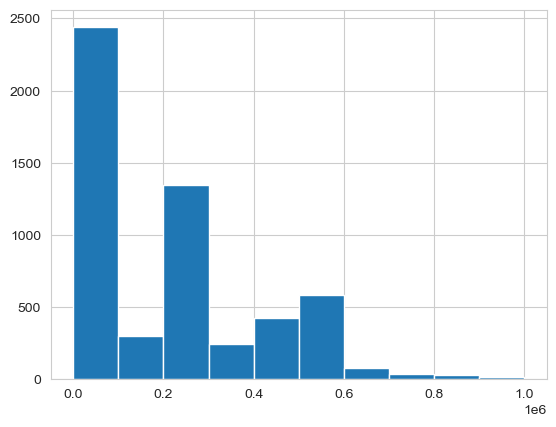

In [86]:
df_stats.m.hist()

In [84]:
df_stats

,graph,n,m,degeneracy,clustering_coeff,closure_weak,time_closure_weak,closure,algo,avg_dist,sample_size,actual_sample_size,seed,time_avg_dist,avg_detour_dist,avg_deg_locality
0,08blocks,38,73,2.0,0.668089,2.0,0.17850,3.0,weighted,1.89616,400,38,4191325316,0.051333,2.00000,0.767123
1,1138_bus,1138,1458,4.0,0.124612,3.0,1.80917,4.0,weighted,12.71160,400,463,2456229116,11.574300,4.12284,0.203124
2,130bit,584,6058,12.0,0.164911,8.0,79.18460,169.0,weighted,2.12301,400,457,3797981859,11.521000,2.10862,0.213053
3,145bit,1002,11251,13.0,0.153693,9.0,257.96200,227.0,weighted,2.16425,400,424,3402401044,16.694200,2.11555,0.195438
4,162bit,3606,37069,12.0,0.094978,7.0,900.84600,393.0,weighted,2.39658,400,465,2282196793,92.062100,2.30114,0.121991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5482,web-spam,4767,37375,NaN,NaN,NaN,NaN,NaN,weighted,3.78902,400,406,180222903,135.065000,2.07208,0.353961
5483,web-webbase-2001,16062,25593,NaN,NaN,NaN,NaN,NaN,weighted,10.19170,400,476,450691777,116.031000,2.25659,0.615704
5484,webkb-wisc,251,450,NaN,NaN,NaN,NaN,NaN,weighted,3.25995,400,251,240545367,0.757667,2.54133,0.359294
5485,wing,62032,121544,NaN,NaN,NaN,NaN,NaN,weighted,39.62590,400,481,1361883161,2156.480000,3.24612,0.056709


In [72]:
# check if every column of name graph is identical
rows = list(df_stats.graph.iterrows())
rows_unique = [set(x[1].unique()) for x in rows]
print(set([len(x) for x in rows_unique]))

In [74]:
set([len(x) for x in rows_unique])

{1, 2}

In [79]:
df_stats.graph.shape[1]

8

In [80]:
df_stats.columns != 'graph'

array([False,  True, False,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True, False,  True,
       False,  True, False,  True,  True])

In [81]:
# remove all but the first column of name 'graph' in df_stats
number_of_graphs_columns = df_stats.graph.shape[1]
# non graph columns
df_stats_non_graph = df_stats.loc[:, df_stats.columns != 'graph']
df_stats2 = pd.concat([df_stats.graph.iloc[:, 0], df_stats_non_graph], axis=1)

In [82]:
df_stats2

,graph,avg_deg_locality,avg_detour_dist,algo,avg_dist,sample_size,actual_sample_size,seed,time_avg_dist,closure_weak,time_closure_weak,closure,clustering_coeff,degeneracy,n,m
0,08blocks,0.767123,2.00000,weighted,1.89616,400,38,4191325316,0.051333,2.0,0.17850,3.0,0.668089,2.0,38,73
1,1138_bus,0.203124,4.12284,weighted,12.71160,400,463,2456229116,11.574300,3.0,1.80917,4.0,0.124612,4.0,1138,1458
2,130bit,0.213053,2.10862,weighted,2.12301,400,457,3797981859,11.521000,8.0,79.18460,169.0,0.164911,12.0,584,6058
3,145bit,0.195438,2.11555,weighted,2.16425,400,424,3402401044,16.694200,9.0,257.96200,227.0,0.153693,13.0,1002,11251
4,162bit,0.121991,2.30114,weighted,2.39658,400,465,2282196793,92.062100,7.0,900.84600,393.0,0.094978,12.0,3606,37069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5482,web-spam,0.353961,2.07208,weighted,3.78902,400,406,180222903,135.065000,NaN,NaN,NaN,NaN,NaN,4767,37375
5483,web-webbase-2001,0.615704,2.25659,weighted,10.19170,400,476,450691777,116.031000,NaN,NaN,NaN,NaN,NaN,16062,25593
5484,webkb-wisc,0.359294,2.54133,weighted,3.25995,400,251,240545367,0.757667,NaN,NaN,NaN,NaN,NaN,251,450
5485,wing,0.056709,3.24612,weighted,39.62590,400,481,1361883161,2156.480000,NaN,NaN,NaN,NaN,NaN,62032,121544


In [66]:
# avg_dist df
df = pd.read_csv(utils.p + 'output_data/avg_dist.csv')
df.head()

df = pd.read_csv(utils.p + 'output_data/size.csv')
df.head()

,graph,algo,avg_dist,sample_size,actual_sample_size,seed,time_avg_dist
0,08blocks,weighted,1.89616,400,38,4191325316,0.051333
1,1138_bus,weighted,12.71160,400,463,2456229116,11.574300
2,130bit,weighted,2.12301,400,457,3797981859,11.521000
3,145bit,weighted,2.16425,400,424,3402401044,16.694200
4,162bit,weighted,2.39658,400,465,2282196793,92.062100


,graph,n,m
0,08blocks,38,73
1,1138_bus,1138,1458
2,130bit,584,6058
3,145bit,1002,11251
4,162bit,3606,37069


In [16]:
bbbfa.run_for_row(new_rows.iloc[419], algo=bbbfa.BiBFS_EdgeBalancedApproximate)

1138_bus 782-974; dist: 8 search_space: 201


graph                                       1138_bus
algo            python-BiBFS_EdgeBalancedApproximate
seed                                      3404785993
s                                                782
t                                                974
dist                                               8
time_dist                                   0.001288
search_space                                     201
Name: 419, dtype: object

In [77]:
new_rows.to_csv('benji_run_10_07_2024.csv', index=False)

In [20]:
new_rows.algo.unique()

array(['python-BiBFS_VertexBalancedApproximate',
       'python-BiBFS_ExactExpandSmallerQueue',
       'python-BiBFS_ExactCheckDirectEdges',
       'python-BiBFS_EdgeBalancedApproximate'], dtype=object)

In [44]:
temp = new_rows.loc[new_rows.algo != 'python-BiBFS_EdgeBalancedApproximate']
temp.groupby(['graph', 's', 't']).dist.agg(lambda x: x.max() - x.min()).max()

1

In [52]:
# get max difference in distance across algos
new_rows.groupby(['graph', 's', 't']).dist.agg(lambda x: x.max() - x.min()).max()

1

In [30]:
# find instances where the distance is different by a lot

new_rows['diff'] = new_rows.groupby(['graph', 's', 't']).dist.transform(lambda x: x.max() - x.min())
new_rows.loc[new_rows['diff'] > 1]

,graph,algo,seed,s,t,dist,time_dist,search_space,diff
802,1138_bus,python-BiBFS_VertexBalancedApproximate,3404785993,535,738,17,0.000750,435,18
802,1138_bus,python-BiBFS_ExactExpandSmallerQueue,3404785993,535,738,17,0.000802,477,18
802,1138_bus,python-BiBFS_ExactCheckDirectEdges,3404785993,535,738,17,0.000802,771,18
802,1138_bus,python-BiBFS_EdgeBalancedApproximate,3404785993,535,738,-1,0.000067,8,18
815,1138_bus,python-BiBFS_VertexBalancedApproximate,3404785993,895,470,19,0.001053,529,20
...,...,...,...,...,...,...,...,...,...
889,1138_bus,python-BiBFS_EdgeBalancedApproximate,3404785993,403,535,-1,0.000095,13,25
892,1138_bus,python-BiBFS_VertexBalancedApproximate,3404785993,981,411,12,0.000509,232,13
892,1138_bus,python-BiBFS_ExactExpandSmallerQueue,3404785993,981,411,12,0.000454,264,13
892,1138_bus,python-BiBFS_ExactCheckDirectEdges,3404785993,981,411,12,0.000433,375,13


In [38]:
new_rows.loc[892]

,graph,algo,seed,s,t,dist,time_dist,search_space,diff
892,1138_bus,python-BiBFS_VertexBalancedApproximate,3404785993,981,411,12,0.000509,232,13
892,1138_bus,python-BiBFS_ExactExpandSmallerQueue,3404785993,981,411,12,0.000454,264,13
892,1138_bus,python-BiBFS_ExactCheckDirectEdges,3404785993,981,411,12,0.000433,375,13
892,1138_bus,python-BiBFS_EdgeBalancedApproximate,3404785993,981,411,-1,0.000032,3,13


In [49]:
bbbfa.run_for_row(new_rows.loc[802].iloc[-1], algo=bbbfa.BiBFS_EdgeBalancedApproximate)

1138_bus 535-738; dist: -1 search_space: 8


graph                                       1138_bus
algo            python-BiBFS_EdgeBalancedApproximate
seed                                      3404785993
s                                                535
t                                                738
dist                                              -1
time_dist                                 767.795143
search_space                                       8
diff                                              18
Name: 802, dtype: object

In [49]:
new_rows.iloc[410:500]

,graph,algo,seed,s,t,dist,time_dist,search_space
802,1138_bus,python-BiBFS_ExactCheckDirectEdges,3404785993,535,738,17,0.000328,771
802,1138_bus,python-BiBFS_EdgeBalancedApproximate,3404785993,535,738,-1,0.000021,6
803,1138_bus,python-BiBFS_VertexBalancedApproximate,3404785993,379,153,15,0.000411,572
803,1138_bus,python-BiBFS_ExactExpandSmallerQueue,3404785993,379,153,15,0.000415,606
803,1138_bus,python-BiBFS_ExactCheckDirectEdges,3404785993,379,153,15,0.000407,590
...,...,...,...,...,...,...,...,...
823,1138_bus,python-BiBFS_EdgeBalancedApproximate,3404785993,1005,319,18,0.000678,358
824,1138_bus,python-BiBFS_VertexBalancedApproximate,3404785993,1126,166,9,0.000108,119
824,1138_bus,python-BiBFS_ExactExpandSmallerQueue,3404785993,1126,166,9,0.000123,133
824,1138_bus,python-BiBFS_ExactCheckDirectEdges,3404785993,1126,166,9,0.000099,147


In [59]:
row= '08blocks	python-BiBFS_VertexBalancedApproximate	3404785993	30	29	1	6.19888305664063E-06	2'.split()
row
# convert to dataframe row
import pandas as pd
row = pd.DataFrame([row], columns=utils.df.columns)
# this time with right dtypes
row = row.astype(utils.df.dtypes)

['08blocks',
 'python-BiBFS_VertexBalancedApproximate',
 '3404785993',
 '30',
 '29',
 '1',
 '6.19888305664063E-06',
 '2']

In [65]:
bbbfa.run_for_row(row.iloc[0], algo=bbbfa.BiBFS_VertexBalancedApproximate)

08blocks 30-29; dist: 1 search_space: 2


graph                                         08blocks
algo            python-BiBFS_VertexBalancedApproximate
seed                                        3404785993
s                                                   30
t                                                   29
dist                                                 1
time_dist                                     0.000142
search_space                                         2
Name: 0, dtype: object

In [66]:
bbbfa.run_for_row(row.iloc[0], algo=bbbfa.BiBFS_ExactExpandSmallerQueue)

08blocks 30-29; dist: 1 search_space: 5


graph                                       08blocks
algo            python-BiBFS_ExactExpandSmallerQueue
seed                                      3404785993
s                                                 30
t                                                 29
dist                                               1
time_dist                                   0.000083
search_space                                       5
Name: 0, dtype: object

In [58]:
row.s

0    30
Name: s, dtype: object

In [5]:
df = utils.df

In [6]:
name = '08blocks'
g = utils.graph_name_to_nk(name)
df.loc[df.graph == name]
apsp = nk.distance.APSP(g)
apsp.run()
apsp.getDistance(4, 23)

,graph,algo,seed,s,t,dist,time_dist,search_space
0,08blocks,bfs,3404785993,4,23,2,0.001542,40
1,08blocks,bfs,3404785993,9,32,2,0.001416,40
2,08blocks,bfs,3404785993,17,24,2,0.000500,40
3,08blocks,bfs,3404785993,12,5,2,0.000500,40
4,08blocks,bfs,3404785993,26,32,2,0.000542,40
...,...,...,...,...,...,...,...,...
495,08blocks,bfs_bi_node_exact,3404785993,9,30,2,0.000542,6
496,08blocks,bfs_bi_node_exact,3404785993,31,18,2,0.000459,6
497,08blocks,bfs_bi_node_exact,3404785993,7,35,2,0.000459,6
498,08blocks,bfs_bi_node_exact,3404785993,10,33,2,0.000500,6


2.0

In [33]:
df.algo.unique()

array(['bfs', 'bfs_bi_balanced', 'bfs_bi_always_swap', 'bfs_bi_node',
       'bfs_bi_node_exact'], dtype=object)

In [10]:
row = df.loc[df.graph == name].iloc[0]
print(row)
import random
import time

s, t = row.s, row.t
seed = row.seed
random.seed(seed)
nk.setSeed(seed, True)
print(s, t)
g = utils.graph_name_to_nk(row.graph)
bbfs = bbbfa.BiBFS(g, 127, 765)
st = time.time()
bbfs.run()
rt = time.time() - st

graph             08blocks
algo                   bfs
seed            3404785993
s                        4
t                       23
dist                     2
time_dist         0.001542
search_space            40
Name: 0, dtype: object
4 23


/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_54091/4118175672.py:8: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(seed)


False

In [12]:
dir(bbfs)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'g',
 'run',
 'sBFS',
 'tBFS',
 'terminate']